<center> <h1>Diabetes Prediction Analysis</h1> </center>
<center> <h2>Logistic Regression</h2> </center>
<center> <h3> Oliver Heady <h3> <center>

In [ ]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

#set seed
import random
random.seed(5600)

## Data and Description

Type 2 diabetes is a problem with the body that causes blood sugar levels to rise higher than normal (hyperglycemia) because the body does not use insulin properly. Specifically, the body cannot make enough insulin to keep blood sugar levels normal. Type 2 diabetes is associated with various health complications such as neuropathy (nerve damage), glaucoma, cataracts and various skin disorders. Early detection of diabetes is crucial to proper treatment so as to alleviate complications.

The data set contains information on 392 randomly selected women who are at risk for diabetes. The data set contains the following variables:

| Variable  | Description                                                                        |
|-----------|------------------------------------------------------------------------------------|
| pregnant  | Number of times pregnant                                                           |
| glucose   | Plasma glucose concentration at 2 hours in an oral glucose tolerance test          |
| diastolic | Diastolic blood pressure (mm Hg)                                                   |
| triceps   | Triceps skin fold thickness (mm)                                                   |
| insulin   | 2 hour serum insulin (mu U/ml)                                                     |
| bmi       | Body mass index ($kg/m^2$, mass in kilograms divided by height in meters-squared)  |
| pedigree  | Numeric strength of diabetes in family line (higher numbers mean stronger history) |
| age       | Age                                                                                |
| diabetes  | Does the patient have diabetes (0 if "No", 1 if "Yes")                             |

#### 1. Read in the data set, call it "dia", and remove the "row" column. Print a summary of the data or the top few rows, and make sure the data makes sense.

In [ ]:
diabetes = pd.read_csv("/content/Diabetes.txt", sep=" ")
diabetes.head()

,row,pregnant,glucose,diastolic,triceps,insulin,bmi,pedigree,age,diabetes
0,1,1,89,66,23,94,28.1,0.167,21,0
1,2,0,137,40,35,168,43.1,2.288,33,1
2,3,3,78,50,32,88,31.0,0.248,26,1
3,4,2,197,70,45,543,30.5,0.158,53,1
4,5,1,189,60,23,846,30.1,0.398,59,1


In [ ]:
dia = diabetes.drop("row", axis=1)
dia.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


#### 2. Print out the number of women who have diabetes and who do not have diabetes.

In [ ]:
dia.value_counts("diabetes")

diabetes
0    262
1    130
dtype: int64

#### 3. Explore the data. Create a color-coded correlation matrix for the covariates. *Comment on why or why not you think multicollinearity may be a problem for this data set.*

In [ ]:
# Check for missing values and data types
print(dia.info())
print(dia.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   392 non-null    int64  
 1   glucose    392 non-null    int64  
 2   diastolic  392 non-null    int64  
 3   triceps    392 non-null    int64  
 4   insulin    392 non-null    int64  
 5   bmi        392 non-null    float64
 6   pedigree   392 non-null    float64
 7   age        392 non-null    int64  
 8   diabetes   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB
None
         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.20000

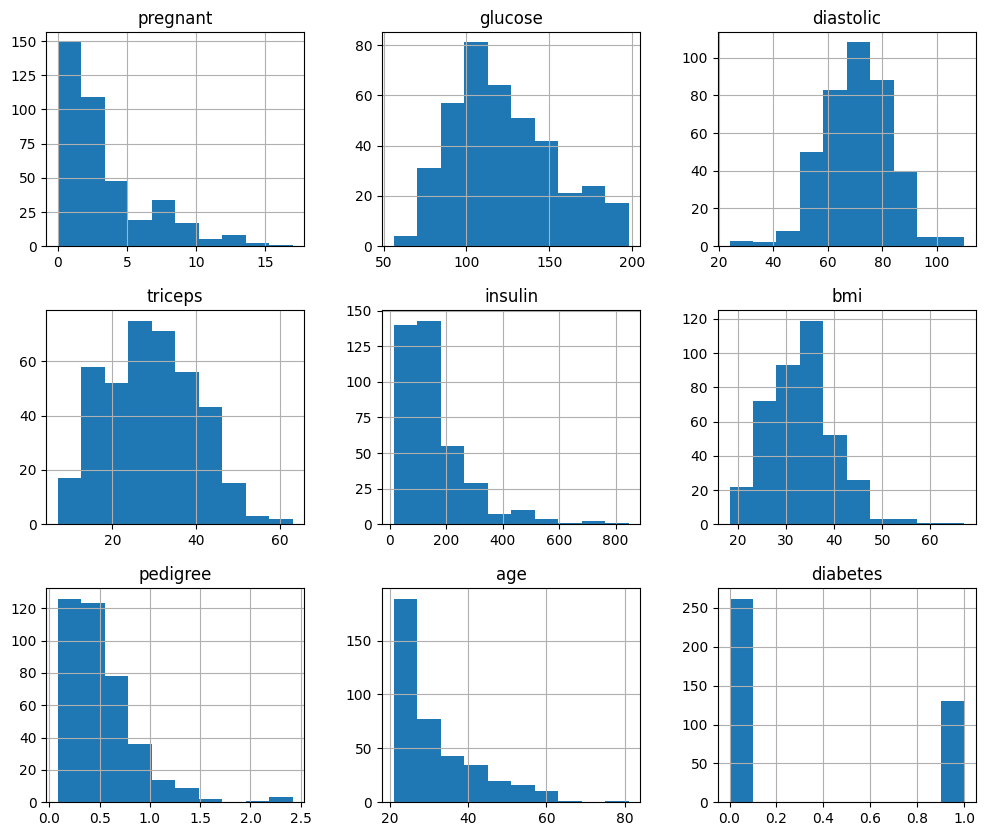

In [ ]:
# Histograms for each variable
dia.hist(figsize=(12, 10))
plt.show()

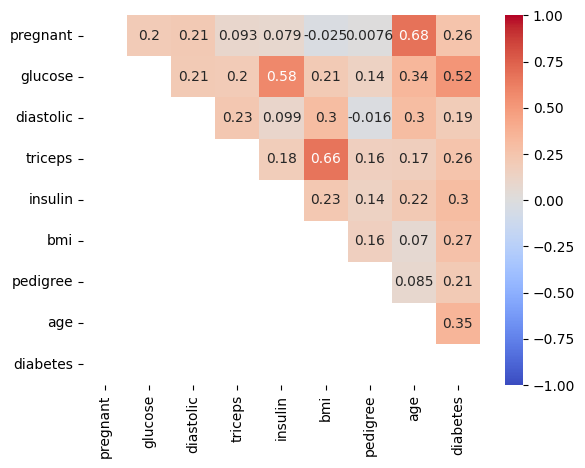

In [ ]:
sns.heatmap(dia.corr(numeric_only = True),
            cmap = 'coolwarm',
            annot = True,
            vmin = -1,
            vmax = 1,
            mask = np.tril(dia.corr(numeric_only = True)))
plt.show()

The relationship between glucose and insulin may be concerning - it makes sense that they might be explaining the same thing. Additionally, it makes sense that there is a relationship between age and number of pregnancies - there might be one that is better than the otherfor this model. Lastly, the relationship between triceps and bmi may be concerning - there is definitely multicolinearity going on but I'm not sure it's high enough to be too concerned about. We'll keep an eye out for it.



#### 4. Explore the data. Create boxplots of the response against the following predictors: glucose, bmi, pedigree, and age (4 plots in total. You may want to use the `plt.subplots` function from the `matplotlib` package to display them in a 2x2 grid). *Briefly comment on one interesting trend you observe.*

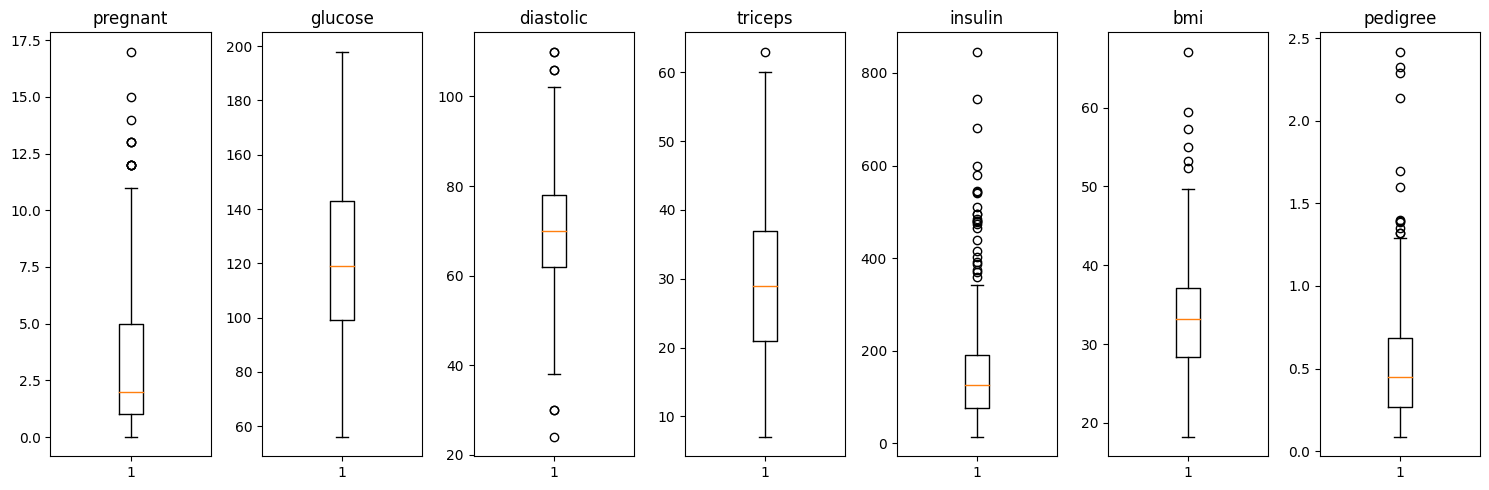

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 7, figsize=(15, 5))

# Loop through each independent variable and create a box plot
for i in range(7):
    axs[i].boxplot(dia.iloc[:, i])
    axs[i].set_title(dia.columns[i])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

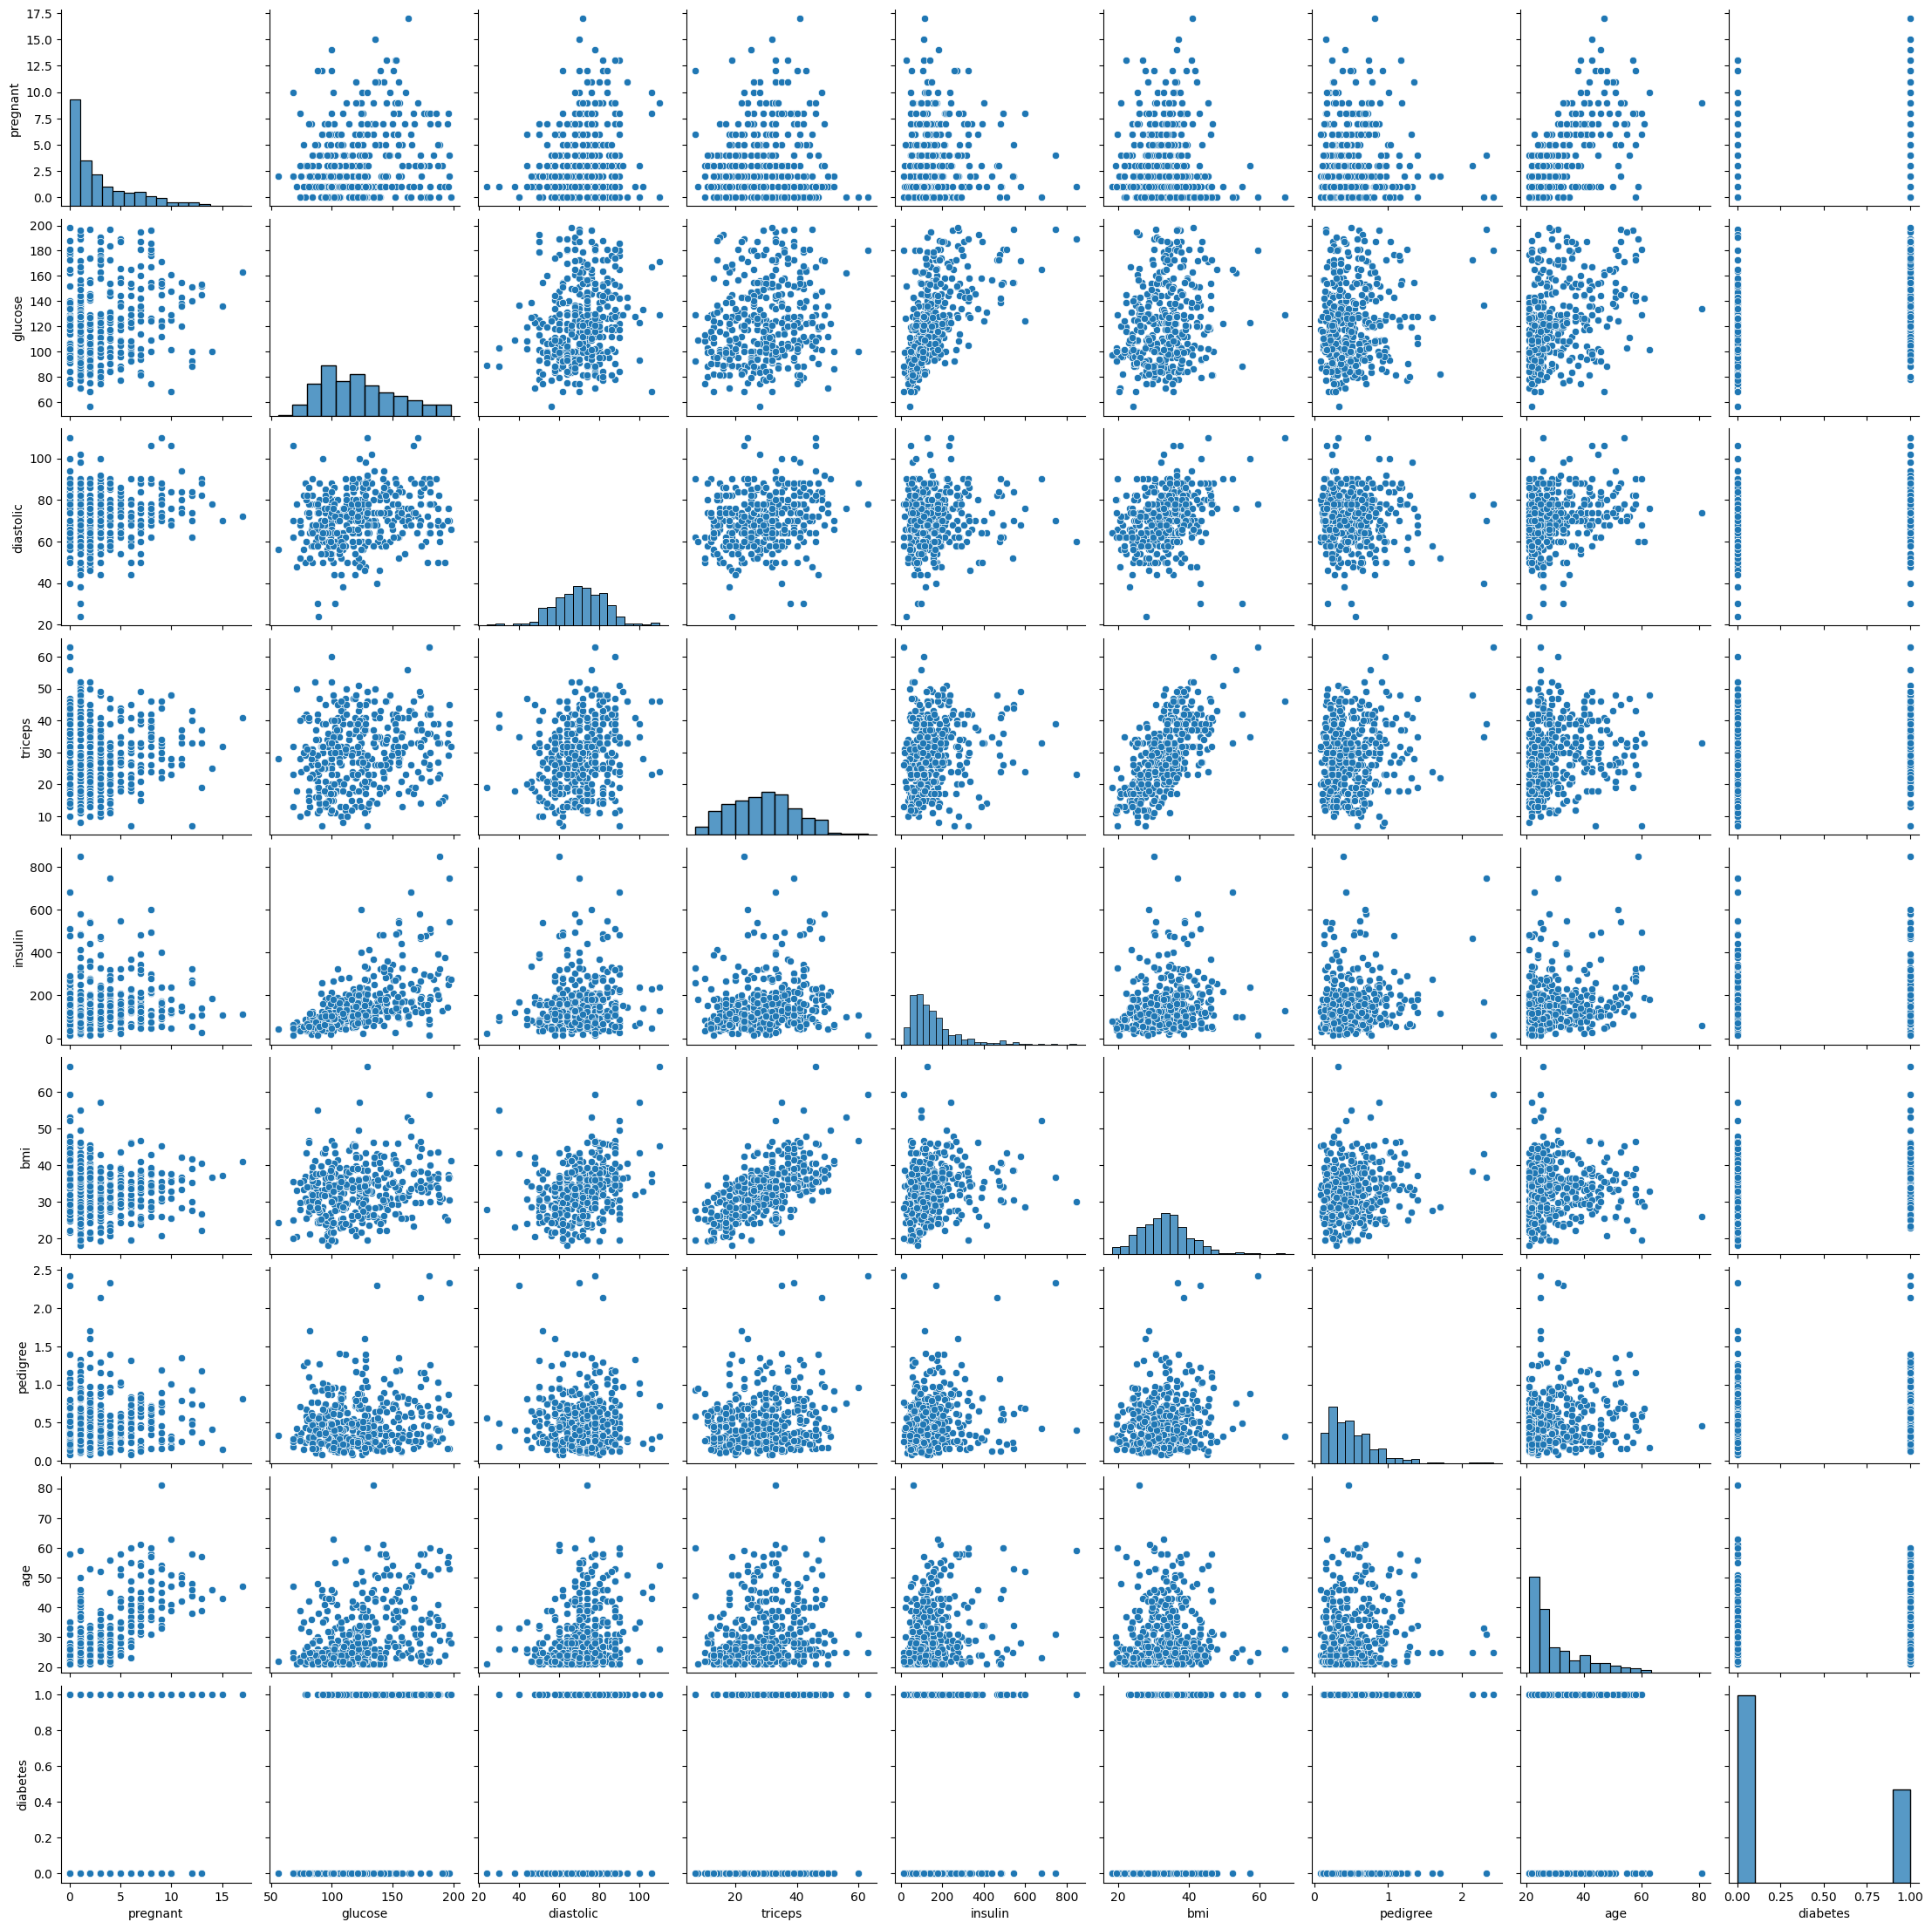

In [ ]:
sns.pairplot(dia)

It's interesting how some of the data points are very right-skewed, while others follow a more normal distribution.


#### 5. Explore the data. Create a color-coded scatterplot of bmi vs glucose colred by diabetes. *Briefly comment on what you observe.*

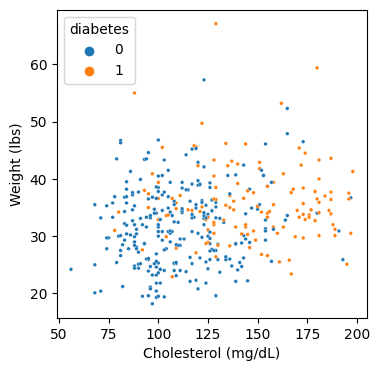

In [ ]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data = dia,
                x = 'glucose',
                y = 'bmi',
                hue = 'diabetes',
                s = 7)
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Weight (lbs)')
plt.show()

Both classes (diabetes and non-diabetes) seem to be pretty cloudlike, so it's hard to draw any specific conclusions. However, the diabetes category seems to veer into the higher cholesterol with a mean of about 150 mg cholestorol, while the non-diabetes category seems centered around 100 mg.


#### 6. Briefly explain why traditional multiple linear regression methods are not suitable for *this* data set. You should mention at least two of the reasons we discussed in class (*your reasons should refer to this data set (i.e. be specific, not general)*).


The dependent variable, diabetes, is binary. This violates the linear assumption of linear regression.

Additionally, error distribution isn't measured in residuals for binary data, meaning that the homoskedascity assumption won't ba applicable.

#### 7. Split the data set into train and test sets using an 80/20 split.

In [ ]:
y = dia['diabetes']
X = dia.drop('diabetes', axis = 1)
y.value_counts()

0    262
1    130
Name: diabetes, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5600)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313, 8) (313,)
(79, 8) (79,)



#### 8. *Using the training data set*, apply one variable selection procedure to help you decide which, if any, variables to omit from the logistic regression model. You may choose which selection method to use (best subsets, backward, or sequential replacement). Use "accuracy" for the scoring metric. Write out the names of the variables you will include in your model.

In [ ]:
best_subsets_selection = EFS(LogisticRegression(fit_intercept = True,
                                                max_iter = 1000),
                             min_features = 1,
                             max_features = len(X_train.columns),
                             scoring = 'accuracy',  # Options: accuracy, f1, precision, recall, roc_auc
                             print_progress = False,
                             cv = 10)

best_subsets = best_subsets_selection.fit(X_train, y_train)

print('Best subset:', best_subsets.best_feature_names_)

Best subset: ('pregnant', 'glucose', 'pedigree', 'age')


Based on the best subsets outcome, I'll include the following variables: pregnant, glucose, pedigree, and age.

#### 9. Write out the general/theoretical logistic regression model for this data set using the covariates that you chose in the previous question. You should use parameters/Greek letters (NOT the "fitted" model using numbers...since you have not fit a model yet;)).

$log(\pi/(1-\pi_i))=\beta_0 + \beta_1pregnant_i + \beta_2glucose_i + \beta_3pedigree_i + \beta_4age_i$

#### 10. Fit a logistic regression model using the covariates you chose. Print a summary of the results.

In [ ]:
X_train_subset = sm.add_constant(X_train[['pregnant', 'glucose', 'pedigree', 'age']])
mod = sm.Logit(y_train, X_train_subset)
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.437010
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  313
Model:                          Logit   Df Residuals:                      308
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3051
Time:                        04:51:49   Log-Likelihood:                -136.78
converged:                       True   LL-Null:                       -196.84
Covariance Type:            nonrobust   LLR p-value:                 5.065e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1843      0.935     -8.758      0.000     -10.016      -6.353
pregnant       0.0356      0.064      0.559      0.576      -0.089       0.160
glucose        0.0400      0.006      7.215      0.000       0.029       0.051
pedigree       1.6567      0.484      3.422      0.001       0.708       2.606
age            0.0420      0.021      2.014      0.044       0.001       0.083
==============================================================================
"""

### Questions 11-15 involve using diagnostics to check the logistic regression model assumptions. For each assumption, (1) code the diagnostic(s) that I indicate (next to the assumption in parentheses) to determine if the assumption is violated, and (2) explain whether or not you think the assumption is violated and *why* you think that.


#### 11. The X's vs log odds are linear (monotone in probability) (Use scatterplots with smoothers - `sm.nonparametric.lowess`)

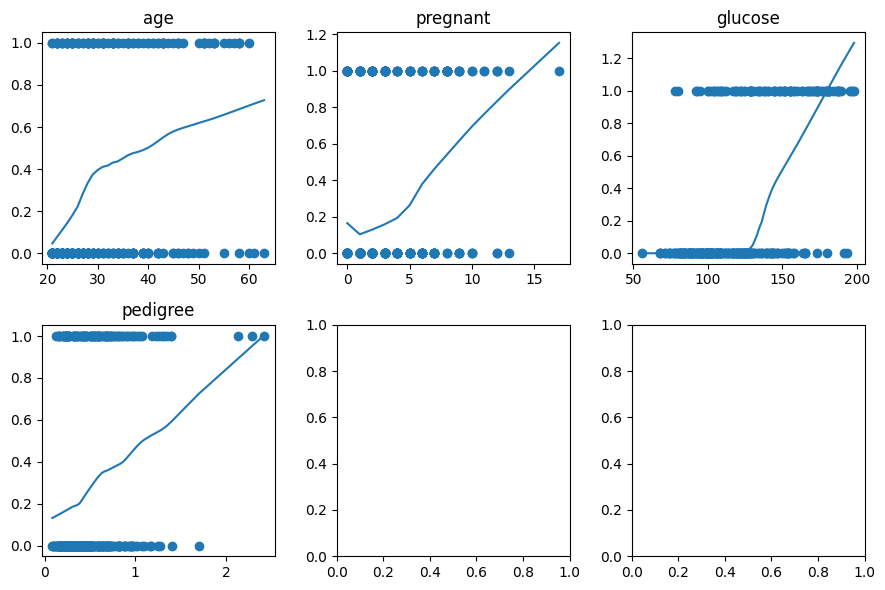

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

out = sm.nonparametric.lowess(y_train, X_train_subset['pregnant'])
ax[0, 1].scatter(y = y_train, x = X_train_subset['pregnant'])
ax[0, 1].plot(out[:, 0], out[:, 1])
ax[0, 1].set_title("pregnant")

out = sm.nonparametric.lowess(y_train, X_train_subset['glucose'])
ax[0, 2].scatter(y = y_train, x = X_train_subset['glucose'])
ax[0, 2].plot(out[:, 0], out[:, 1])
ax[0, 2].set_title("glucose")

out = sm.nonparametric.lowess(y_train, X_train_subset['pedigree'])
ax[1, 0].scatter(y = y_train, x = X_train_subset['pedigree'])
ax[1, 0].plot(out[:, 0], out[:, 1])
ax[1, 0].set_title("pedigree")

out = sm.nonparametric.lowess(y_train, X_train_subset['age'])
ax[0, 0].scatter(y = y_train, x = X_train_subset['age'])
ax[0, 0].plot(out[:, 0], out[:, 1])
ax[0, 0].set_title("age")

plt.tight_layout()
plt.show()

Assumption met - no interactions are visible on these charts.

#### 12. The observations are independent (no diagnostic tools - just think about how the data was collected and briefly write your thoughts)


Assumption met - the description states that these women were randomly selected, and that each observation is a unique woman.


#### 13. The model describes all observations (i.e., there are no influential points) (Use DFFITS)

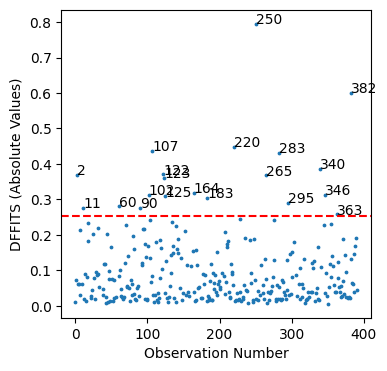

In [ ]:
# DFFITS
X_train_subset['dffits'] = res.get_influence().summary_frame()['dffits_internal']

# plot DFFITS against the observation number
fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(X_train_subset.index, np.abs(X_train_subset['dffits']), s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(X_train_subset)), color = 'r', linestyle = 'dashed')

#OPTIONAL: code to grab potential outliers
outliers = X_train_subset[np.abs(X_train_subset['dffits']) > 2 * np.sqrt(len(res.params) / len(X_train_subset))]
for i in list(outliers.index):
        plt.annotate(str(i), (i, np.abs(X_train_subset['dffits'][i])))
plt.show()

Assumption met - there are two points - 250 and 382, that deviate a bit from the others, but I wouldn't consider them to be influential points.


#### 14. Additional predictor variables are not required (no diagnostic tools - just think about the variables you have and if there are other variables you think would help predict the response)


Assumption met - given the scope of this study, these seem like the most data we could get without being too invasive or costly.

#### 15. No multicollinearity (Use variance inflation factors)

In [ ]:
dia_logistic_vifs = pd.DataFrame()
dia_logistic_vifs['Feature'] = X_train_subset.columns[1:6]
dia_logistic_vifs['VIF'] = [vif(X_train_subset, i) for i in range(1, len(X_train_subset.columns[0:6]))]

print("Max = ", max(dia_logistic_vifs['VIF']))
print("Mean = ", np.mean(dia_logistic_vifs['VIF']))
dia_logistic_vifs

Max =  1.9811126587482164
Mean =  1.3921278766490137


,Feature,VIF
0,pregnant,1.823428
1,glucose,1.134788
2,pedigree,1.017135
3,age,1.981113
4,dffits,1.004177


Assumption met! These variance inflation factors are very low, indicating no multicolinearity.


#### 16. Briefly comment on if all assumptions are met. We will move forward with the data set as-is, but if there is something you would want to do before proceeding to statistical inference, explain what that would be.

The assumptinos are met. Let's move forward!

#### 17. For the coefficient for pedigree, compute (and output) the log odds ratio ($\beta_{bmi}$, pull this value from the model output), odds ratio ($\exp\{\beta_{bmi}\}$), and the odds ratio converted to a percentage ($100 \times (\exp\{\beta_{bmi}\} - 1)%$). *If you did not include pedigree in your model, just pick a variable you did include instead.*

In [ ]:
# log odds ratio:
lor = res.params['pedigree']
print(lor)

# odds ratio:
print(np.exp(lor))

# odds ratio converted to a percentage
print(100 * (np.exp(lor) - 1))

1.6567167032493708
5.2420712830257
424.20712830256997


#### 18. Interpret the coefficient for pedigree based on the FOUR different ways we discussed in class. *If you did not include pedigree in your model, use the same variable you chose in the previous question.*


Interpretation 1: Holding all else constant, as pedigree increases by one unit, the log odds of diabetes = 1 increases by 5.24

Interpretation 2: The log odds of diabetes = 1 increase as pedigree increases, holding all else constant.

Interpretation 3: Holding all else constant, as pedigree increases by one unit, the odds of diabetes = 1 is 5.24 times more likely.

Interpretation 4: Holding all else constant, as pedigree increases by one unit, the odds of diabetes = 1 increases by 424.21%.

#### 19. Create (and output) 95% confidence intervals for $\beta_k$, $\exp\{\beta_k\}$, and $100 \times (\exp\{\beta_k\} - 1)%$ for glucose using the `confint` function. *If you did not include glucose in your model, just pick a variable you did include instead.*

In [ ]:
# Get the confidence interval for the coefficient of 'glucose'
conf_int_log_odds = res.conf_int().loc['glucose']

# Exponentiate the confidence intervals to get them for the odds ratios
conf_int_odds_ratio = np.exp(conf_int_log_odds)

# Convert the confidence intervals to percentage terms
conf_int_percentage = 100 * (conf_int_odds_ratio - 1)

# Display the results
print("Confidence Interval for Log Odds (Glucose):\n", conf_int_log_odds)
print("Confidence Interval for Odds Ratio (Glucose):\n", conf_int_odds_ratio)
print("Confidence Interval in Percentage (Glucose):\n", conf_int_percentage)


Confidence Interval for Log Odds (Glucose):
 0    0.029133
1    0.050865
Name: glucose, dtype: float64
Confidence Interval for Odds Ratio (Glucose):
 0    1.029562
1    1.052181
Name: glucose, dtype: float64
Confidence Interval in Percentage (Glucose):
 0    2.956184
1    5.218103
Name: glucose, dtype: float64


#### 20. Interpret the three 95% confidence intervals for glucose you found in the previous question (three interpretations total). *If you did not include pedigree in your model, use the same variable you chose in the previous question.*



*Interpretation 1:* The confidence interval for the log odds is between 0.029133 and 0.050865. This interval represents the estimated range of the log odds ratio associated with a one-unit increase in glucose, with 95% confidence.

*Interpretation 2:* The confidence interval for the odds ratio is between approximately 1.029562 and 1.052181. This means that a one-unit increase in glucose is associated with an approximate 3.0% to 5.2% increase in the odds of the outcome.

*Interpretation 3:* Expressed in percentage terms, the interval ranges from about 2.956% to 5.218%. This interpretation is a more intuitive way of understanding the odds ratio. It suggests that for each one-unit increase in glucose, the odds of the outcome increase by about 2.96% to 5.22%.


#### 21. Calculate a 95% confidence interval for the predicted probability that a patient has diabetes where pregnant = 1, glucose = 90, diastolic = 62, triceps = 18, insulin = 59, bmi = 25.1, pedigree = 1.268 and age = 25. Note that you may not need to use all of these values depending on the variables you chose to include in your model. *Do you think this patient will develop diabetes? Why or why not?*

In [ ]:
pred = res.get_prediction([1, 1, 90, 1.268, 25], which = 'linear')
pred.summary_frame(alpha = 0.05)

,predicted,se,ci_lower,ci_upper
0,-1.398608,0.426838,-2.235195,-0.562022


With a predicted value of -1.39, we can safely assume that this woman probably won't develop type 2 diabetes.

#### 22. What is the $p$-value of the likelihood ratio test (aka deviance, aka model chi-squared)? (You can copy/paste this from the model summary output from question 10). What does this $p$-value tell you?

The P-value is extremely small at 5.065e-25. This indicates that least one of the predictors in the model has a significant effect on the outcome variable (diabetes).

#### 23. What is the best cutoff value for the model that minimizes the percent misclassified? Show your code and output the best cutoff value.

In [ ]:
possible_cutoffs = np.linspace(0, 1, 100)
percent_misclass = np.ones(100)
predicted_probabilities = np.exp(res.fittedvalues) / (1 + np.exp(res.fittedvalues))

for i in range(len(possible_cutoffs) - 1):
  cutoff = possible_cutoffs[i]
  classify = (predicted_probabilities > cutoff).astype(int)
  percent_misclass[i] = np.mean((classify != y_train.astype(int)).astype(int))

cutoff = possible_cutoffs[np.argmin(percent_misclass)]
cutoff

0.5050505050505051

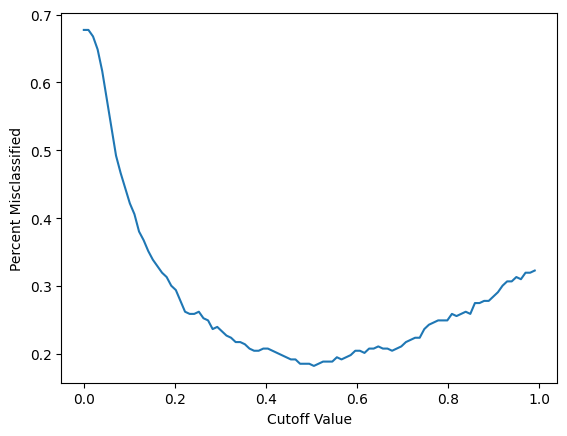

In [ ]:
plt.plot(possible_cutoffs[:-1], percent_misclass[:-1])
plt.xlabel('Cutoff Value')
plt.ylabel('Percent Misclassified')
plt.show()

#### 24. Create (and output) a confusion matrix FOR THE TEST DATA SET using the best cutoff value you found above.

In [ ]:
# Get predicted probabilities for the test data set
X_test_subset = sm.add_constant(X_test[['pregnant', 'glucose', 'pedigree', 'age']])
pred_probs_test = res.predict(X_test_subset)

# Use the cutoff to get predicted classifications of 0/1
preds_test = (pred_probs_test > cutoff).astype(int)
# Get confusion matrix
conf_mat = confusion_matrix(y_test, preds_test)
conf_mat

array([[43,  7],
       [15, 14]])

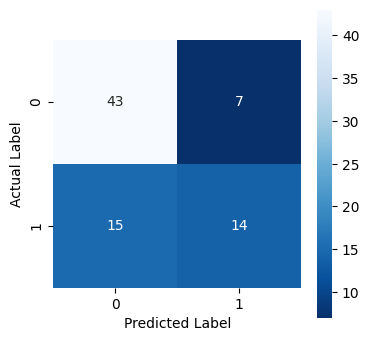

In [ ]:
# Confusion matrix with labels
plt.figure(figsize = (4, 4))
sns.heatmap(conf_mat,
            annot = True,
            fmt = ".0f",
            square = True,
            cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### 25. Based on the confusion matrix, calculate (and output) the value for the specificity. What does the specificity measure in context of this data set?

In [ ]:
print(43/(43+7))

0.86


The model correctly identifies 48% of the true negatives. This is definitely too low, and means that 52% of the negatives are incorrectly labeled. Our model can use some work.

#### 26. Based on the confusion matrix, calculate (and output) the value for the sensitivity. What does the sensitivity measure in context of this data set?

In [ ]:
print(14/(14+15))

The model correctly identifies 86% of the true positives. This is pretty good, and means that only 14% of the positives are incorectly predicted.

#### 27. Based on the confusion matrix, calculate (and output) the percent correctly classified (accuracy). What does the percent correctly classified measure in context of this data set?

In [79]:
print((43+14)/(43+7+14+15))

0.7215189873417721


Accuracy is an overall look at how many were correctly classified - and while 72% is better than random guessing, it's probably not good enough for clinical diagnosis.

#### 28. What is the AUC FOR THE TEST DATA?

In [83]:
roc_auc_score(y_test, pred_probs_test)

0.8075862068965518

#### 29. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.


Just because we're able to fit a good model that meets assumptions and has a high p-value, doesn't mean that the model is good enough for the context that it's going to be applied to.


#### 30. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.


1) This data set includes various health metrics, and this analysis aimed to predict a patient's diabetes diagnosis using these metrics.

2) Based on our abailable data, my team was able to fit a model that can predict a patiant's diabetes diagnosis with 72% accuracy, which is not high enough for our prestigious institution.